# Visualização de dados gerais das despesas da Administração Pública do Distrito Federal

## Fonte dos dados

Os dados foram obtidos pelo [Portal da Transparência](https://www.transparencia.df.gov.br/#/downloads) do Distrito Federal, compreendendo o período de 2009 a abril de 2023. Para os fins desta análise, somente os dados de 2009 a 2022 foram utilizados, já que os dados de 2023 não estão completos.

Entre os meses de abril e maio de 2023, houve uma mudança no site do Portal da Transparência. O endereço mudou e os dados todos foram padronizados, o que facilitou a análise.

## Qualidade e limpeza dos dados

Os conjuntos de dados estavam armazenados em pastas `.zip`, contendo vários arquivos em formato `.csv` (_comma separated values_, ou valores separados por vírgulas). Foram utilizados apenas os arquivos descritos como `Despesa_Principal_<ano>.csv`.

Todos os valores nos conjuntos de dados, inicialmente, estavam entre aspas. Para evitar erros de interpretação de valores monetários como `string` (texto), em vez de `float` (números com ponto flutuante), todas as aspas foram removidas. Além disso, o separador utilizado nos arquivos é o `;`, por causa dos valores monetários, que tem suas casas decimais separadas com o uso de `,` . Novamente, para evitar erros de interpretação destes valores, todos os pontos dos arquivos foram removidos e, em seguida, as vírgulas foram trocadas por `.` . Um efeito colateral disso é que, na coluna `"FUNÇÃO"`, o ponto final que havia no final de todos os valores também foi removido. Outro problema identificado nos valores monetários foi o de valores iguais a 0. Os valores nesse caso apareciam como `.00`. Para evitar que valores que não tivessem centavos (por exemplo, `460.00`) fossem substituídos, toda ocorrência de `;.00` foi trocada por `;0.00`. Assim, foi possível manter a integridade das colunas e dos valores. Valores nos conjuntos de dados que eram apenas texto não tiveram seu entendimento prejudicado pelo uso de pontos em vez de vírgulas.

O maior problema na limpeza dos dados foi a formatação. Em inúmeros casos (a grande maioria), as linhas continham vários espaços em branco adicionais totalmente desnecessários ao final de um valor, ou até mesmo no meio de um valor. Para resolver isto, os espaços em branco adicionais foram substituídos por nenhum caractere. Aos poucos, foi possível reduzir esses erros até que todos os valores tivessem o mínimo possível de espaços em brancos entre as palavras, e nenhum espaço em branco ao final.

Todas as alterações descritas acima foram feitas utilizando o próprio editor de texto Notepad (Microsoft), usando a função Find and Replace (`Ctrl+H`).

Ao tentar importar alguns desses dados utilizando a biblioteca `pandas`, no entanto, outros erros foram encontrados. Os dados eram importados, porém a biblioteca não conseguia interpretar os tipos de valores de certas colunas. Ao tentar especificar o tipo de uma dessas colunas, que deveria conter apenas `int` (números inteiros), um novo erro apareceu, desta vez especificando que não era possível interpretar como `int` um valor descrito como `'-DISTRITO FEDERAL'` naquela coluna. Sabendo que esta era a terminação de alguns valores dentro de outras colunas, supôs-se que aquelas linhas que continham dados errados estavam, na verdade, separadas do início da linha. O seguinte código foi utilizado para encontrar as linhas que causavam esses erros:

    despesas_<ano> = pd.read_csv("Despesa_Principal_<ano>.csv", sep=";")

Após a biblioteca `pandas` indicar erros em certas colunas:

    despesas_<ano> = pd.read_csv("Despesa_Principal_<ano>.csv", sep=";",
                                 dtype={"EXERCÍCIO":int})

Após indicação de erro, como a variável já havia sido criada anteriormente no ambiente de execução:

    erro = despesas_<ano>[despesas_<ano>["EXERCÍCIO" == "-DISTRITO FEDERAL"]
    erro
    
Isto retornava um objeto do tipo `pandas.DataFrame` com o índice, que apontava em qual linha dos arquivos `.csv` os erros se encontravam. Agora, passando aos arquivos em si e encontrando as linhas, verificou-se que a suposição inicial estava correta. Curiosamente, não houve erro na importação dos arquivos indicando que certas linhas não possuíam o número esperado de colunas. Após uma longa repetição deste processo para cada erro de interpretação ocorrido com os arquivos, finalmente, todos os erros foram corrigidos. 

## Importando a biblioteca `seaborn` e os módulos `matplotlib.pyplot` e `functions_and_variables`

In [1]:
from functions_and_variables import *
import matplotlib.pyplot as plt
import seaborn as sns

## Despesas por função a cada ano, em escala logarítmica

Limite à esquerda = 1

Limite à direita = 10 bilhões

In [2]:
plt.figure(figsize=(64,128))
ax_log_dpf = sns.barplot(data=dpf_all_years,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                         palette="Spectral")
ax_log_dpf.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log_dpf.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log_dpf.set_ylabel("FUNÇÃO",fontsize=16) # y axis label
ax_log_dpf.tick_params(labelsize=20)
ax_log_dpf.set_xscale("log") # setting to log scale for better visualization
plt.show()

A visualização aqui não ficou muito boa. Por isso, vou separar esse gráfico em cinco. Como temos 25 funções diferentes no total, teremos 5 funções em cada gráfico.

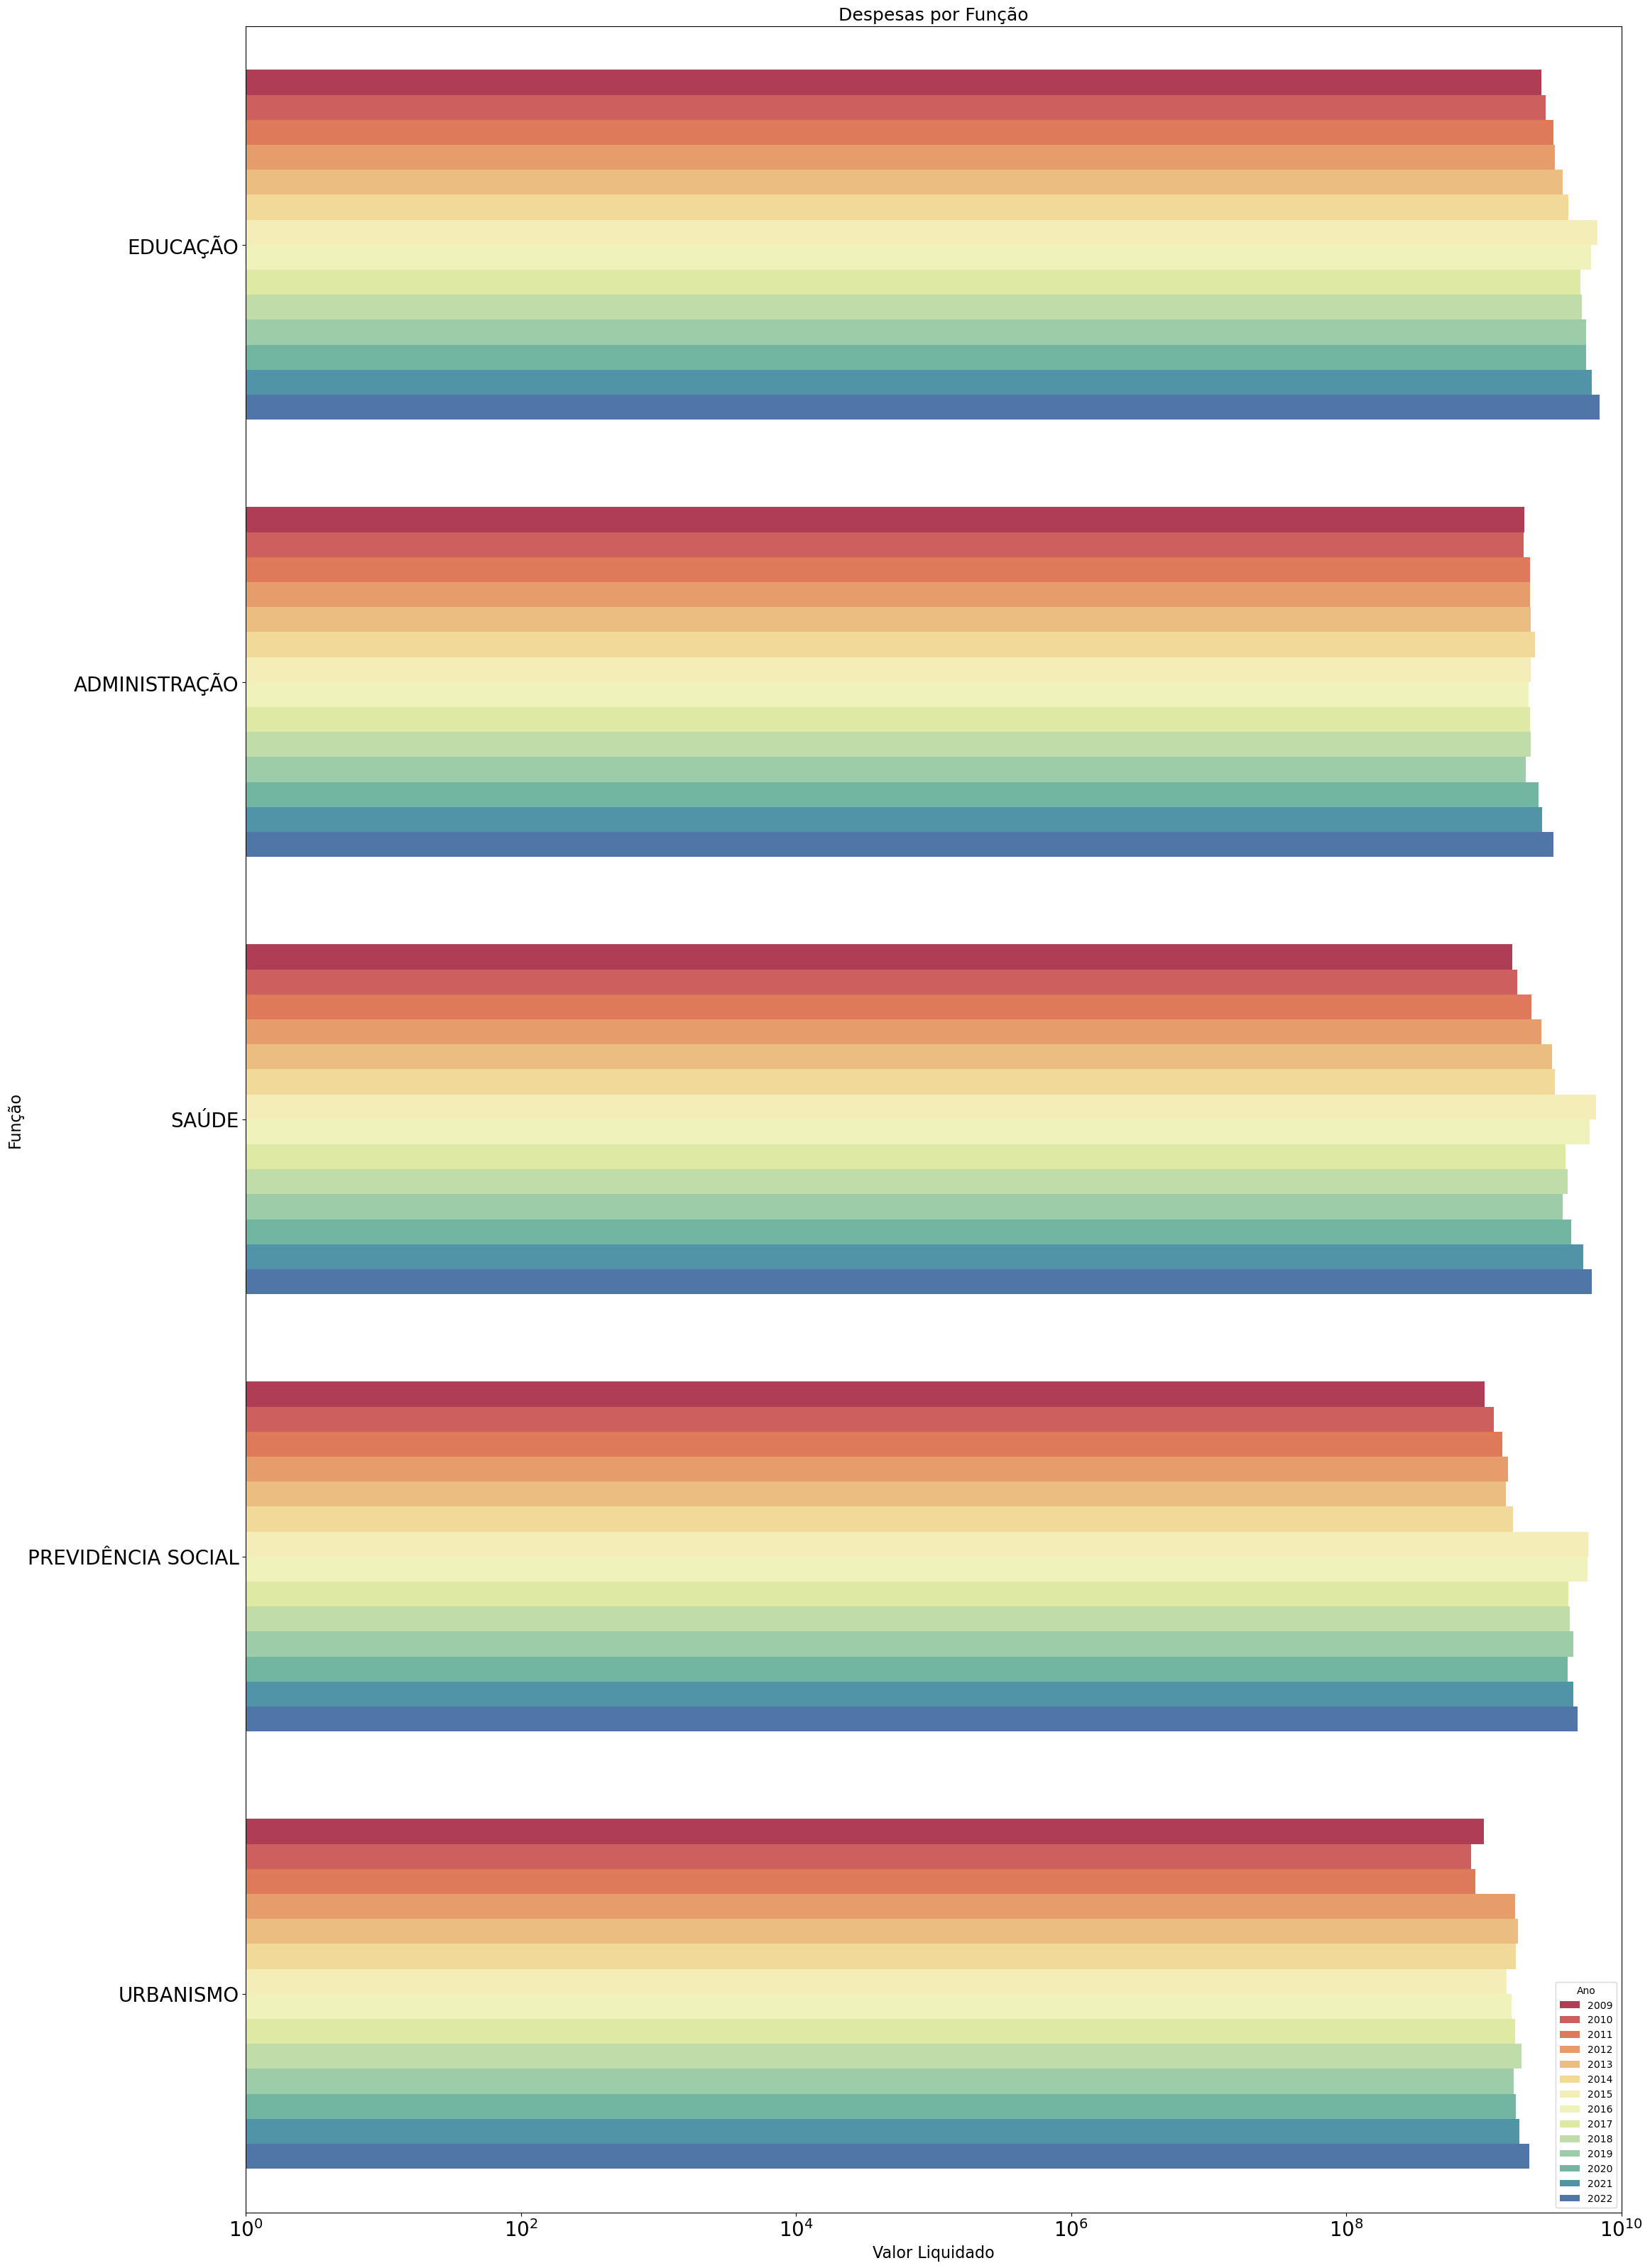

In [3]:
function_list = ["EDUCAÇÃO","ADMINISTRAÇÃO","SAÚDE","PREVIDÊNCIA SOCIAL",
                 "URBANISMO","TRANSPORTE","ENCARGOS ESPECIAIS","LEGISLATIVA",
                 "ASSISTÊNCIA SOCIAL","SEGURANÇA PÚBLICA","AGRICULTURA",
                 "CULTURA","ENERGIA","DESPORTO E LAZER","COMÉRCIO E SERVIÇOS",
                 "CIÊNCIA E TECNOLOGIA","TRABALHO","GESTÃO AMBIENTAL",
                 "DIREITOS DA CIDADANIA","SANEAMENTO","HABITAÇÃO","JUDICIÁRIA",
                 "COMUNICAÇÕES","ESSENCIAL À JUSTIÇA","INDÚSTRIA"]

dpf_all_findex = dpf_all_years.set_index("FUNÇÃO")
dpf_top5 = dpf_all_findex.loc[function_list[0:5]].reset_index()

plt.figure(figsize=(25,40))
ax_log1 = sns.barplot(data=dpf_top5,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                      palette="Spectral")
ax_log1.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log1.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log1.set_ylabel("Função",fontsize=16) # y axis label
ax_log1.tick_params(labelsize=20)
ax_log1.set_xscale("log") # setting to log scale for better visualization
ax_log1.set_xlim(left=1.0e0,right=1.0e10)
plt.show()

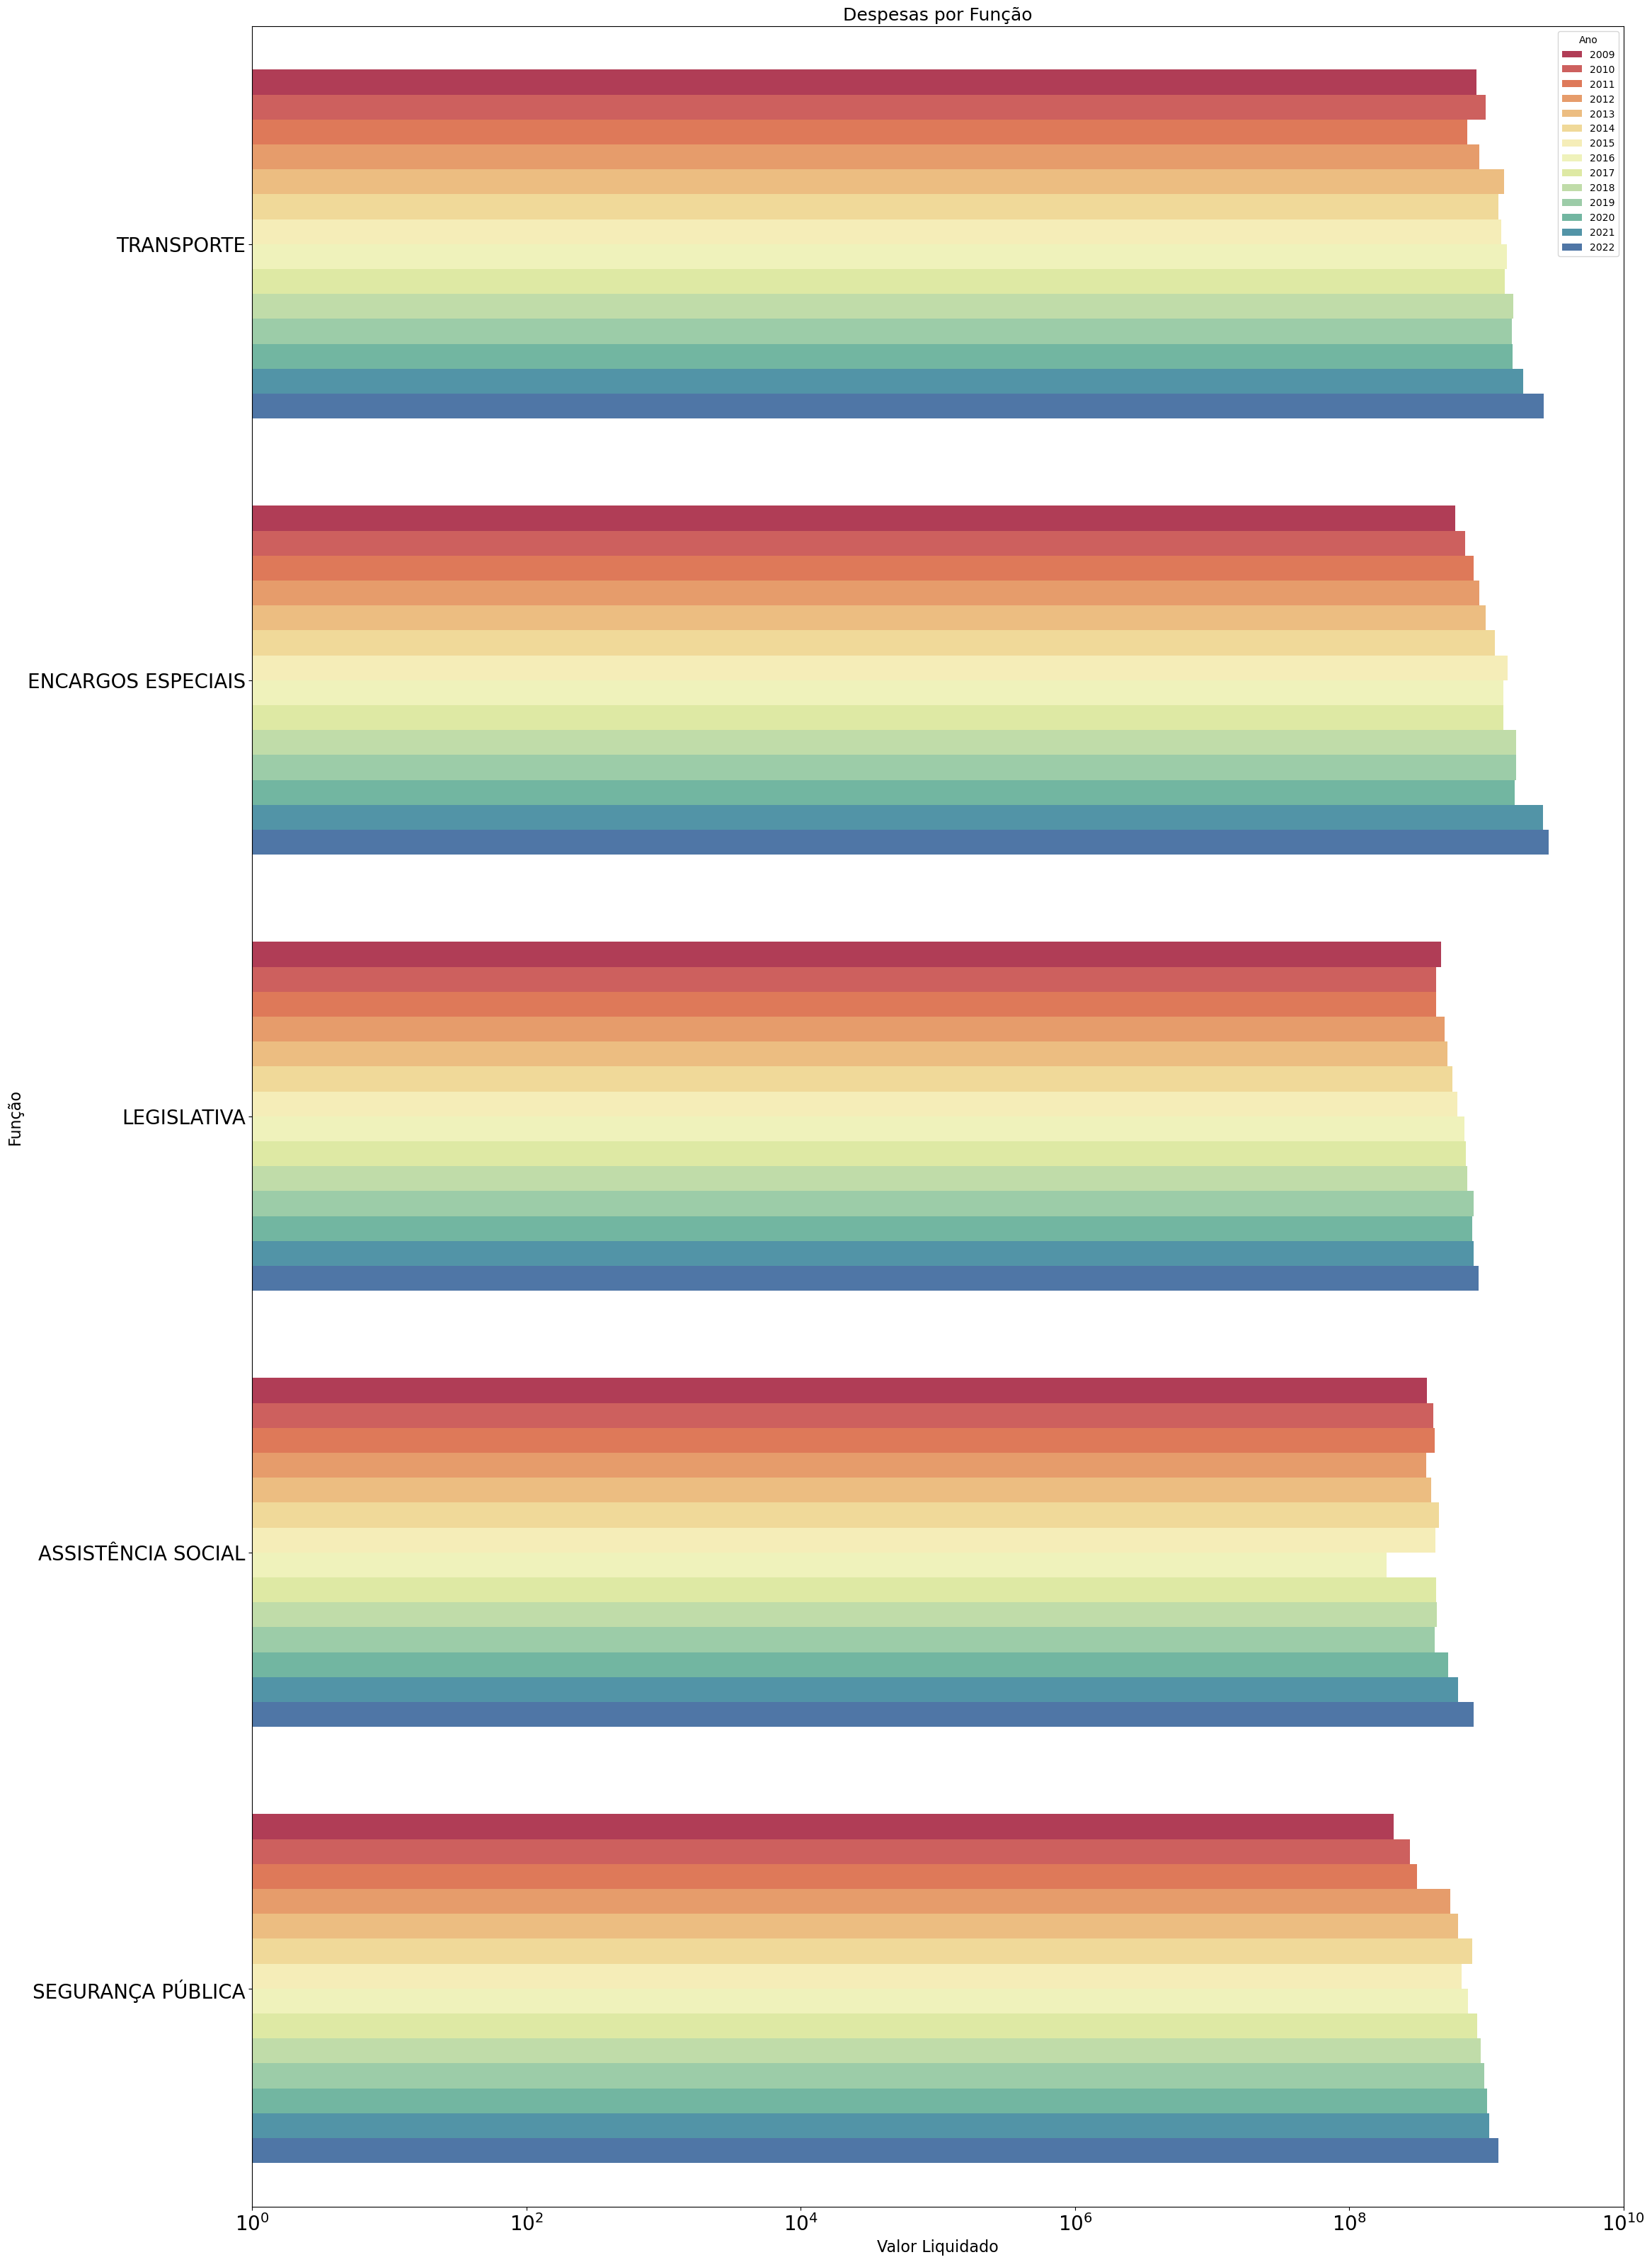

In [4]:
dpf_all_findex = dpf_all_years.set_index("FUNÇÃO")
dpf_5to10 = dpf_all_findex.loc[function_list[5:10]].reset_index()

plt.figure(figsize=(25,40))
ax_log2 = sns.barplot(data=dpf_5to10,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                      palette="Spectral")
ax_log2.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log2.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log2.set_ylabel("Função",fontsize=16) # y axis label
ax_log2.tick_params(labelsize=20)
ax_log2.set_xscale("log") # setting to log scale for better visualization
ax_log2.set_xlim(left=1.0e0,right=1.0e10)
plt.show()

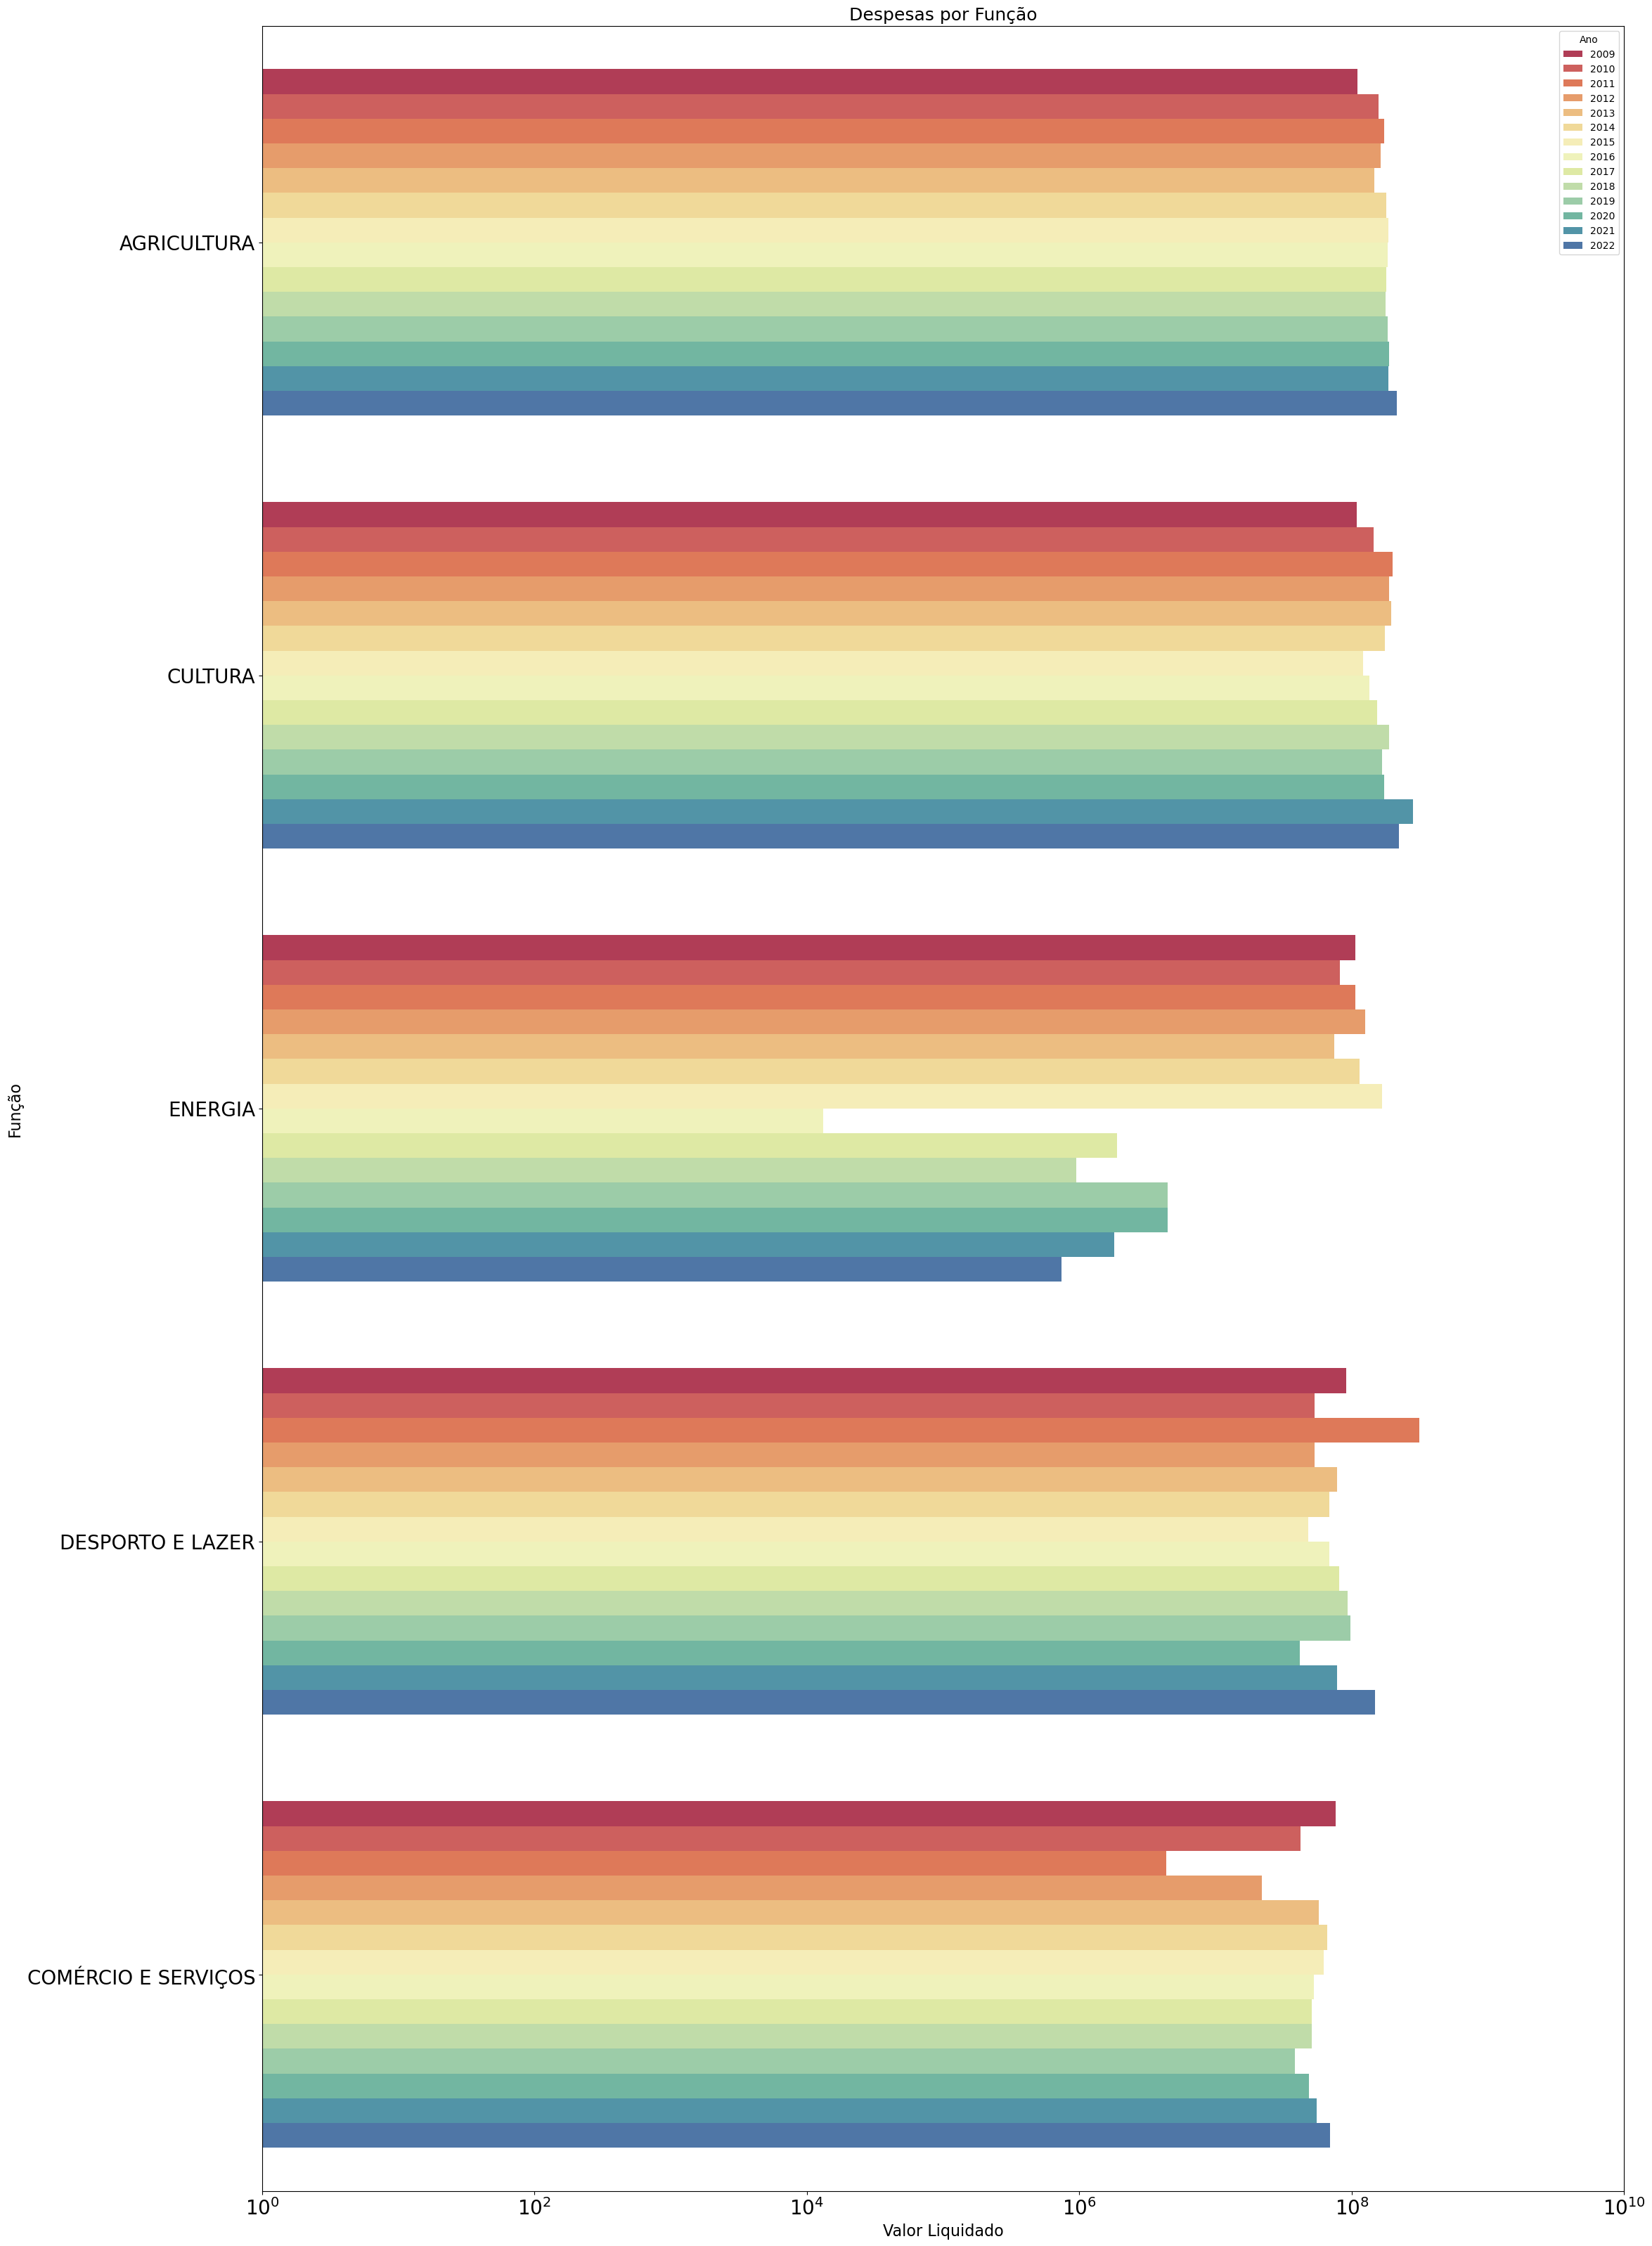

In [5]:
dpf_all_findex = dpf_all_years.set_index("FUNÇÃO")
dpf_10to15 = dpf_all_findex.loc[function_list[10:15]].reset_index()

plt.figure(figsize=(25,40))
ax_log3 = sns.barplot(data=dpf_10to15,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                      palette="Spectral")
ax_log3.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log3.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log3.set_ylabel("Função",fontsize=16) # y axis label
ax_log3.tick_params(labelsize=20)
ax_log3.set_xscale("log") # setting to log scale for better visualization
ax_log3.set_xlim(left=1.0e0,right=1.0e10)
plt.show()

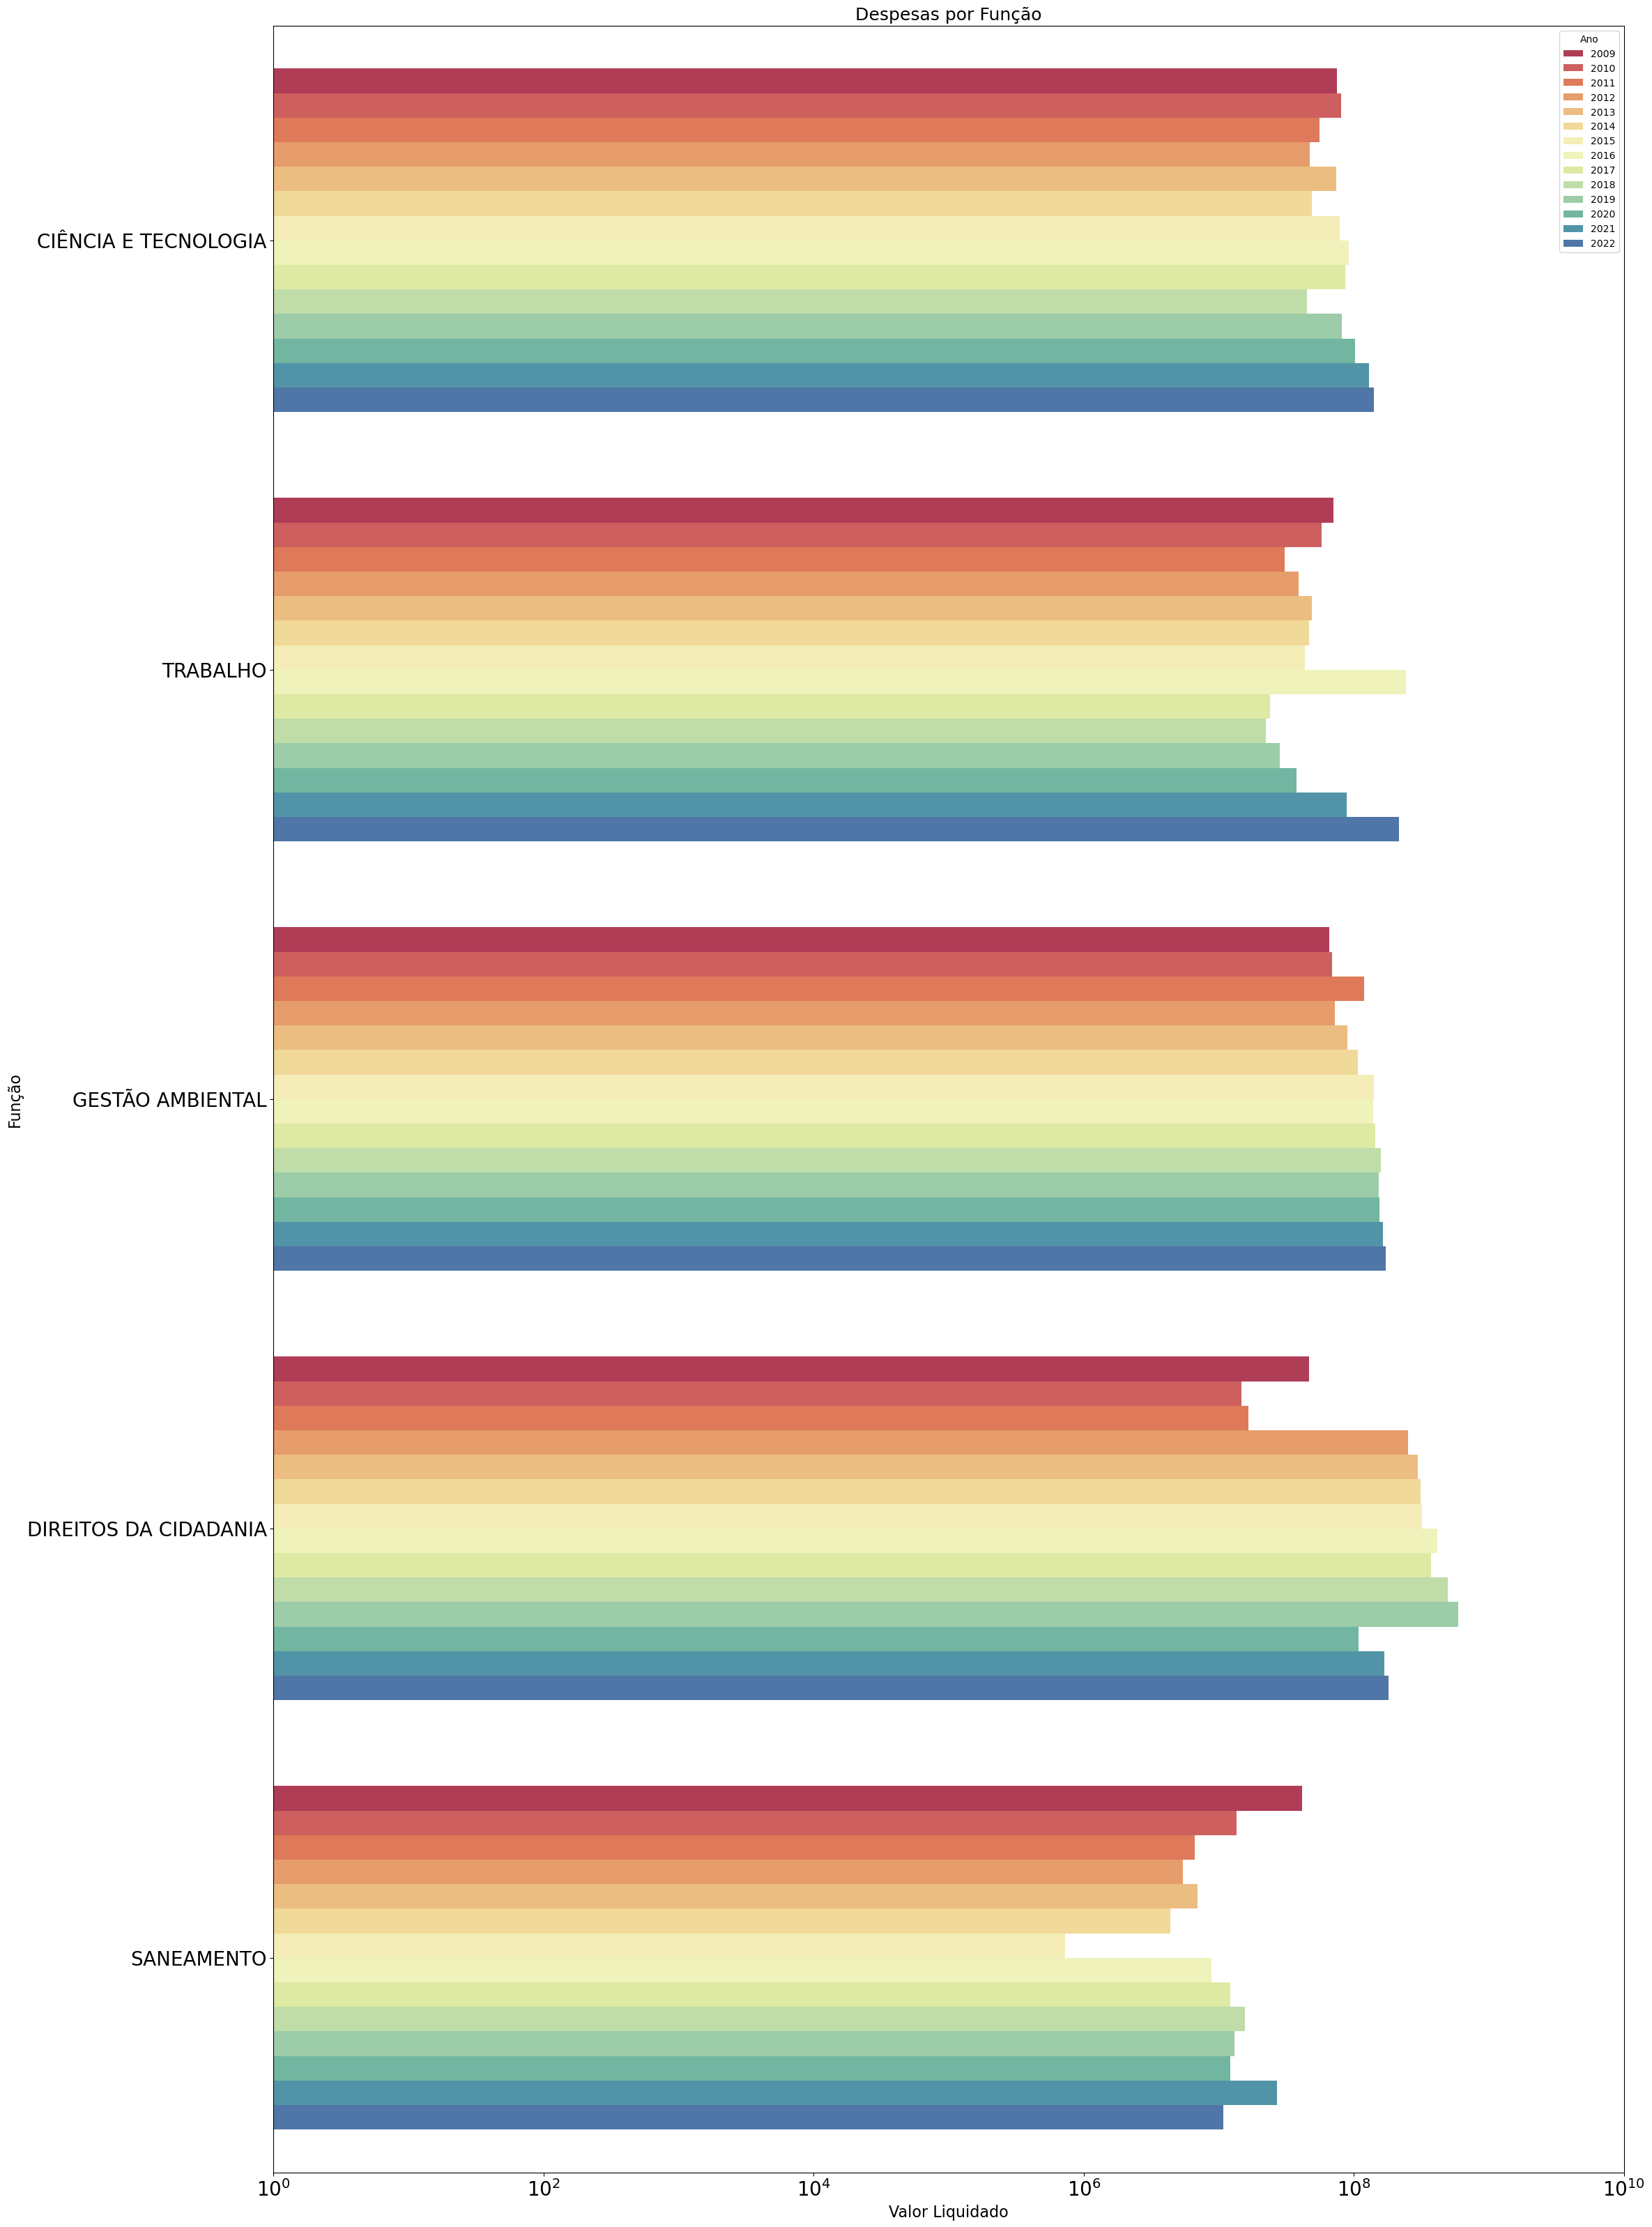

In [6]:
dpf_all_findex = dpf_all_years.set_index("FUNÇÃO")
dpf_15to20 = dpf_all_findex.loc[function_list[15:20]].reset_index()

plt.figure(figsize=(25,40))
ax_log4 = sns.barplot(data=dpf_15to20,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                      palette="Spectral")
ax_log4.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log4.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log4.set_ylabel("Função",fontsize=16) # y axis label
ax_log4.tick_params(labelsize=20)
ax_log4.set_xscale("log") # setting to log scale for better visualization
ax_log4.set_xlim(left=1.0e0,right=1.0e10)
plt.show()

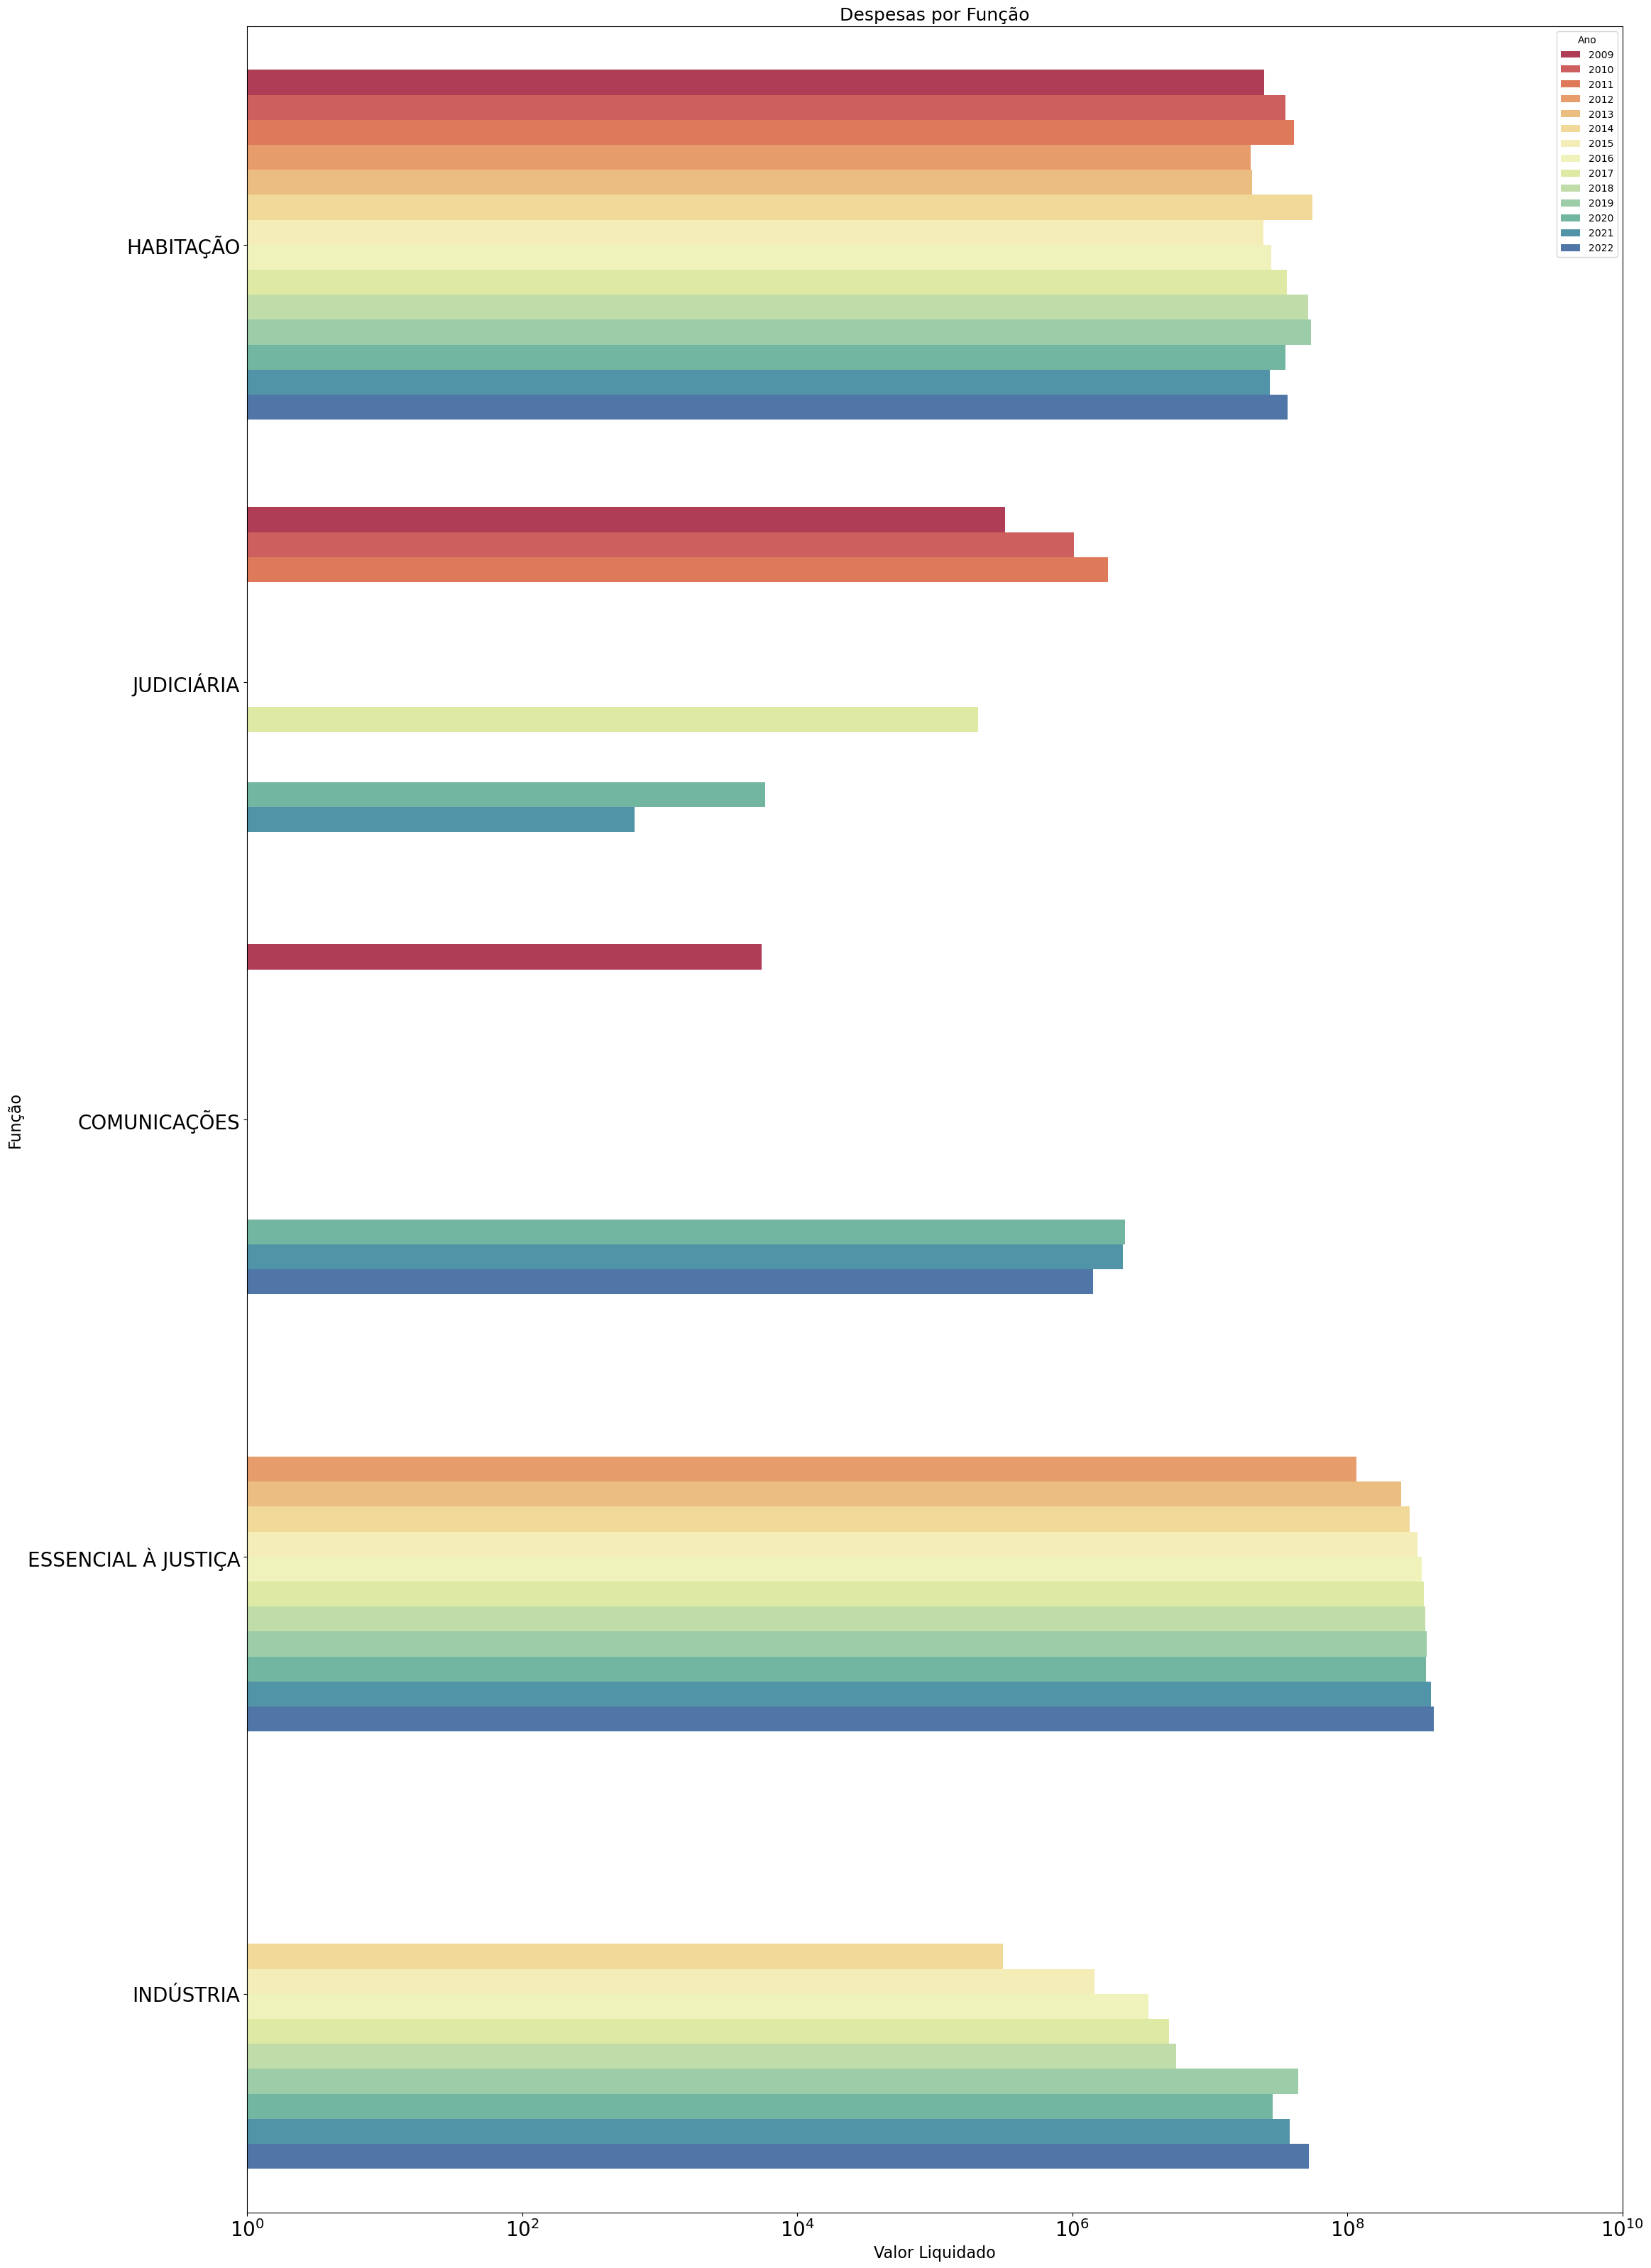

In [7]:
dpf_all_findex = dpf_all_years.set_index("FUNÇÃO")
dpf_20to25 = dpf_all_findex.loc[function_list[20:25]].reset_index()

plt.figure(figsize=(25,40))
ax_log5 = sns.barplot(data=dpf_20to25,x="LIQUIDADO",y="FUNÇÃO",hue="Ano",
                      palette="Spectral")
ax_log5.axes.set_title("Despesas por Função",fontsize=18) # title
ax_log5.set_xlabel("Valor Liquidado",fontsize=16) # x axis label
ax_log5.set_ylabel("Função",fontsize=16) # y axis label
ax_log5.tick_params(labelsize=20)
ax_log5.set_xscale("log") # setting to log scale for better visualization
ax_log5.set_xlim(left=1.0e0,right=1.0e10)
plt.show()

Separação das funções `"JUDICIÁRIA"` e `"ESSENCIAL À JUSTIÇA"` ao longo dos anos.

## Despesas por função no ano de 2020

Aqui, um exemplo de gráfico das despesas de um ano por função:

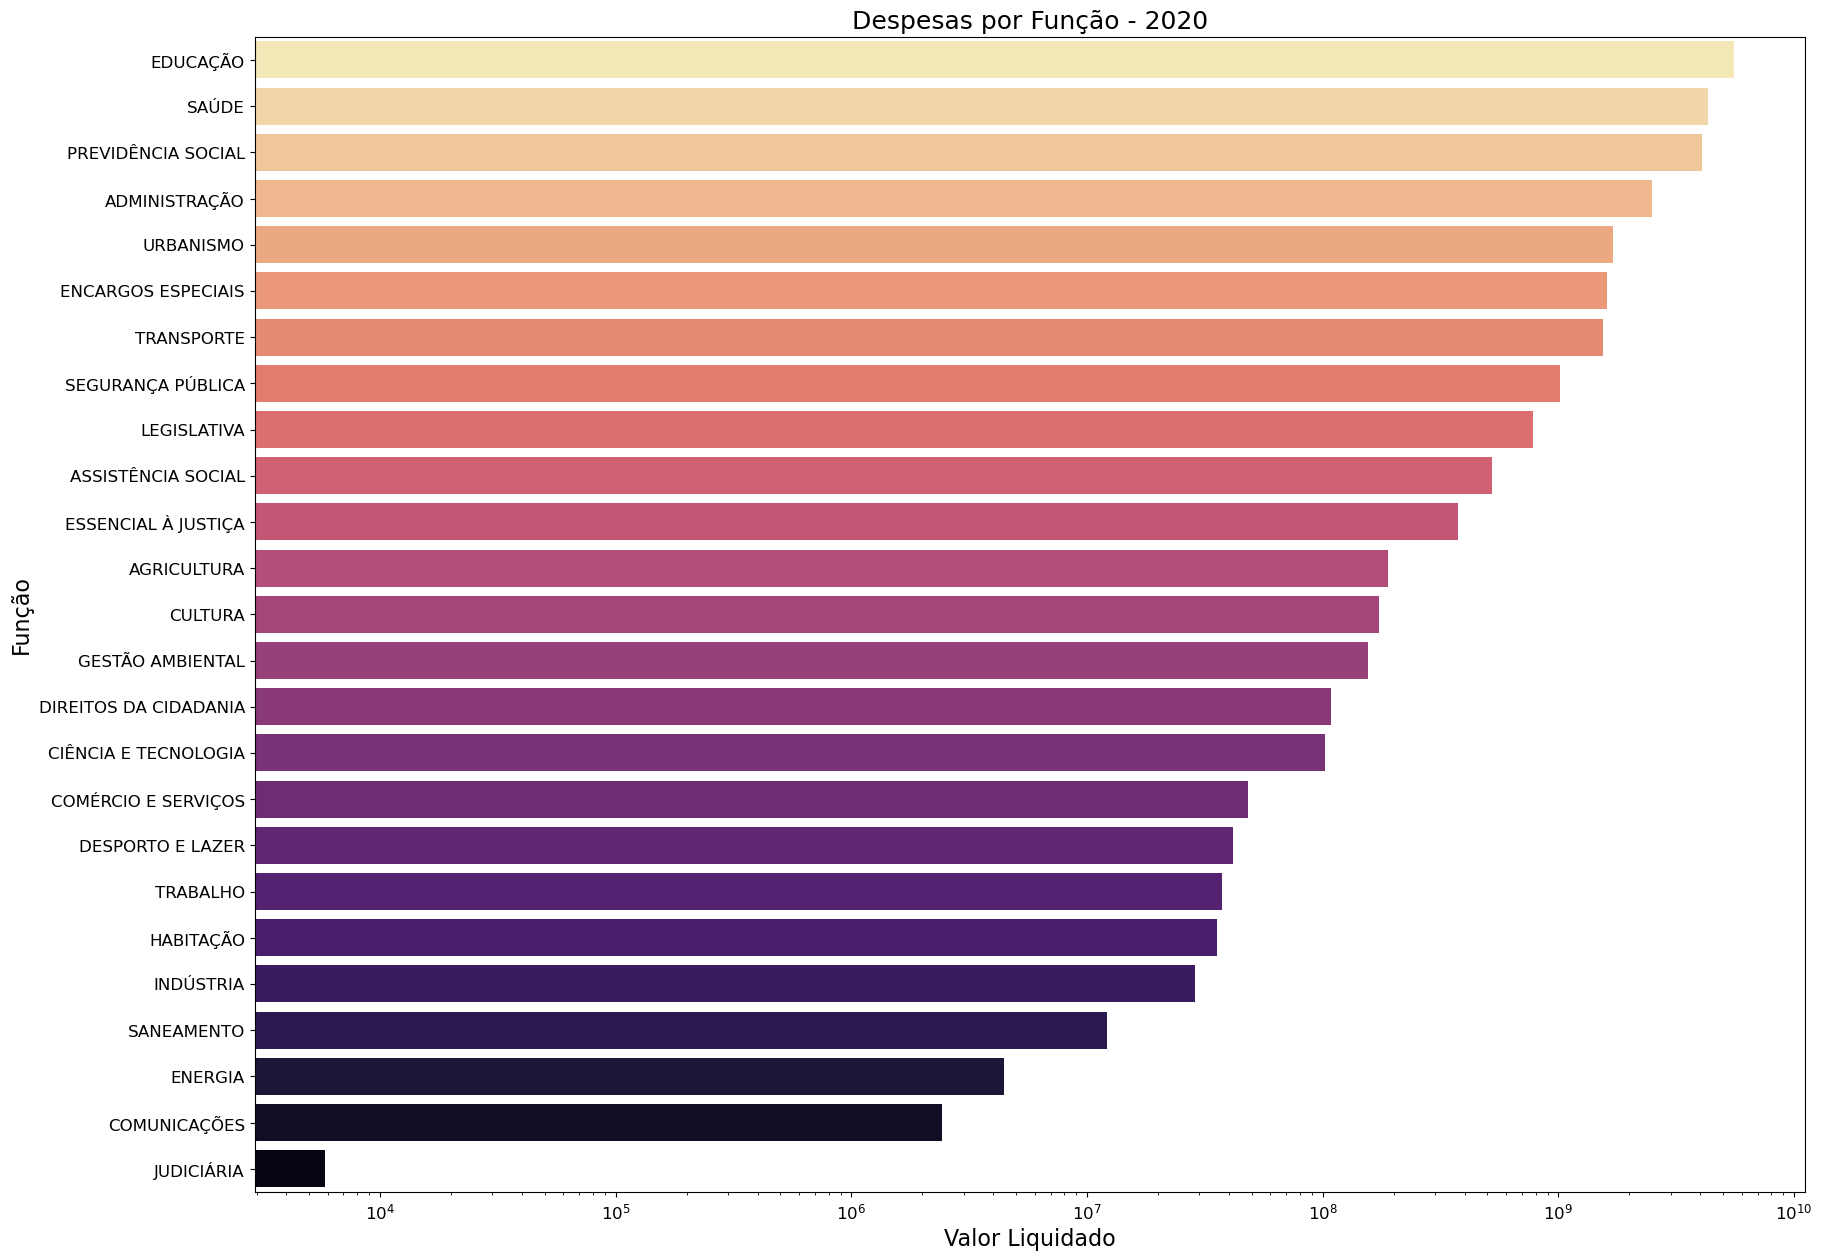

In [10]:
plt.figure(figsize=(20,15))
ax_log_2020 = sns.barplot(dpf_2020,x="LIQUIDADO",y="FUNÇÃO",palette="magma_r")
ax_log_2020.axes.set_title("Despesas por Função - 2020",fontsize=18)
ax_log_2020.set_xlabel("Valor Liquidado",fontsize=16)
ax_log_2020.set_ylabel("Função",fontsize=16)
ax_log_2020.tick_params(labelsize=12)
ax_log_2020.set_xscale("log")
plt.show()

## Dados sobre Transporte ao longo dos anos

Este é um exemplo de gráfico de uma única função a cada ano.

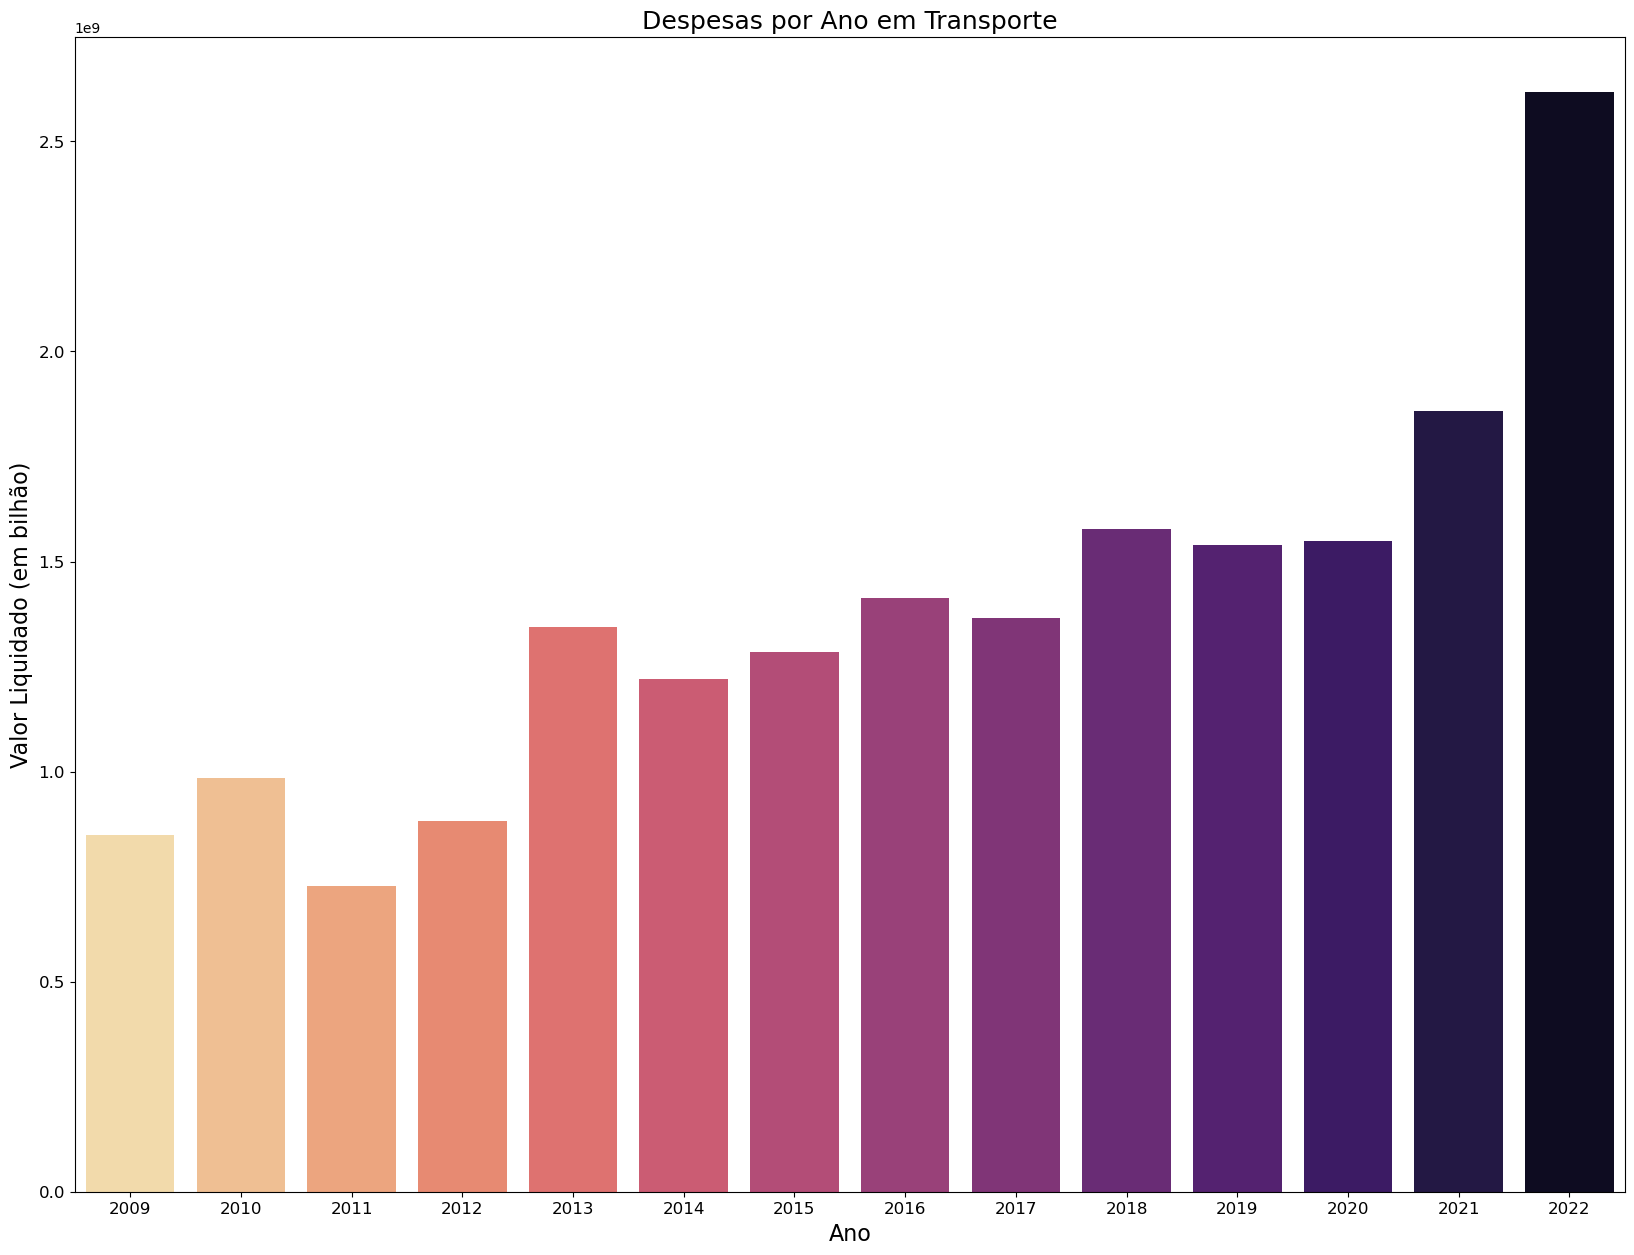

In [11]:
plt.figure(figsize=(20,15))
ax = sns.barplot(transporte_yearly,x=transporte_yearly.index,y="LIQUIDADO",
                 palette="magma_r")
ax.axes.set_title("Despesas por Ano em Transporte",fontsize=18)
ax.set_xlabel("Ano",fontsize=16)
ax.set_ylabel("Valor Liquidado (em bilhão)",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

* 2011: Licitação do Sistema de Transporte Público Coletivo (ônibus) - 5 empresas diferentes, com estipulação de tarifas técnicas como remuneração das empresas concessionárias.
* 2012: Contratos assinados (verificar).
* 2016: CPI (não deu em nada)